In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'sarjana': [0,0,0,1,1,1],
    'acc': [0,0,1,0,1,1]})
df

,sarjana,acc
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,1


        sarjana
           |
   T ------------- F
     |           |
     Acc        No Acc
     +2 -1      +1 -2

### Gini Impurity
- Hitung Gini u/ tiap leaf dalam feature: S1 True & S1 False
- Gini $\displaystyle = 1 - $ (proba_1) $^2 -  $
  (proba_0) $^2$ 
- Hitung Gini total untuk 1 feature (Gini S1)
-- GiniS1 True = 0.44
-- GiniS1 False = 0.44
-- GiniS1 = sum(totalDataLeafx/ total Data) * giniLeafx
-- GiniS1 = (S1True/total data) * GiniS1 True + (S1False/total) * GiniS1 Flases

In [1]:
GiniS1_TRUE = 1-(2/3)**2 - (1/3)**2
GiniS1_TRUE 

0.4444444444444445

In [2]:
GiniS1_FALSE = 1 - (1/3)**2 - (2/3)**2
GiniS1_FALSE

0.4444444444444444

In [3]:
GiniS1 = (3/6)*GiniS1_TRUE + (3/6)*GiniS1_FALSE 
GiniS1

0.4444444444444444

In [31]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc.fit(df[['sarjana']], df['acc'])
dtc.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

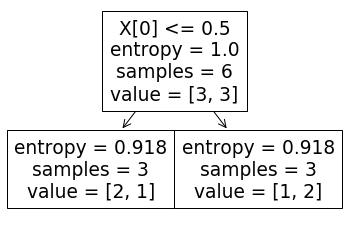

In [32]:
tree.plot_tree(dtc.fit(df[['sarjana']], df['acc']))

In [21]:
tree.export_graphviz(
    dtc.fit(df[['sarjana']], df['acc']),
    out_file = 'decision.dot',
    feature_names=['Sarjana'],
    class_names=['Diterima', 'Tidak Diterima']
)

https://dreampuf.github.io/GraphvizOnline

![decisiontree](./decision.png)

### Entropy & Gain
- Hitung Entropy untuk tiap leaf feature: E(s1True) & E(s1False)
- Entropy $\displaystyle \sum -p_i log_2 (p_i)$
- Gain = Entropy - Entropy feature

        sarjana
           |
   T ------------- F
     |           |
     Acc        No Acc
     +2 -1      +1 -2

- Entropy(Acc) = E(3,6)


In [24]:
Es1TruedTrue = -1 * (2/3) * np.log2(2/3)
Es1TruedFalse = -1 * (1/3) * np.log2(1/3)
Es1True = Es1TruedTrue + Es1TruedFalse
Es1TruedTrue, Es1TruedFalse, Es1True

(0.38997500048077083, 0.5283208335737187, 0.9182958340544896)

In [30]:
Es1FalsedTrue = -1 * (1/3) * np.log2(1/3)
Es1FalsedFalse = -1 * (2/3) * np.log2(2/3)
Es1False = Es1TruedFalse + Es1FalsedFalse
Es1FalsedTrue, Es1FalsedFalse, Es1False

(0.5283208335737187, 0.38997500048077083, 0.9182958340544896)

In [34]:
Es1 = -1 * (3/6 * np.log2(3/6)) - (3/6 * np.log2(3/6))
Es1

1.0

In [37]:
df2 = pd.DataFrame([
    {'sarjana':0, 'sehat':1, 'supel':1, 'diterima':1},
    {'sarjana':1, 'sehat':0, 'supel':0, 'diterima':1},
    {'sarjana':0, 'sehat':1, 'supel':1, 'diterima':0},
    {'sarjana':0, 'sehat':0, 'supel':1, 'diterima':0},
    {'sarjana':1, 'sehat':0, 'supel':1, 'diterima':0},
])
df2

,sarjana,sehat,supel,diterima
0,0,1,1,1
1,1,0,0,1
2,0,1,1,0
3,0,0,1,0
4,1,0,1,0


        sarjana
           |
   T ------------- F
     |           |
     Acc        Acc
     +2 -0     +0 -3

Gini S1True =  1 - (2/2)^2 - (0/2)^2 = 0
Gini S1False = 1 - (0/3)^2 - (3/3)^2 = 0
Gini S1 = (2/5) * 0 + (3/5) * 0 = 0

         sehat
           |
   T ------------- F
     |           |
     Acc        Acc
     +1 -1     +1 -2

Sehat S1True =  1 - (1/2)^2 - (1/2)^2 = 0.5
Sehat S1False = 1 - (1/3)^2 - (2/3)^2 = 0.444
Gini S1 = (2/5) * 0 + (3/5) * 0 = 0.467

        supel
           |
   T ------------- F
     |           |
     Acc        Acc
     +1 -3     +1 -0

Supel True =  1 - (1/4)^2 - (3/4)^2 = 0.5
Supel False = 1 - (1/1)^2 - (0/1)^2 = 0.444
Gini Supwl = (2/5) * 0 + (3/5) * 0 = 0.467


In [36]:
GiniSehatTrue = 1 - (1/2)**2 - (1/2)**2
GiniSehatFalse = 1 - (1/3)**2 - (2/3)**2
GiniSehat = (2/5) * GiniSehatTrue + (3/5) * GiniSehatFalse
GiniSehatTrue, GiniSehatFalse, GiniSehat

(0.5, 0.4444444444444444, 0.4666666666666667)